# Predicting Restaurant Food Cost 

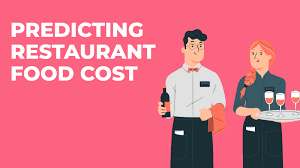

# Introduction

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

# Attributes

***Size of training set:*** 12,690 records

***Size of test set:*** 4,231 records




***FEATURES:***

***TITLE:*** The feature of the restaurant which can help identify what and for whom it is suitable for.

***RESTAURANT_ID:*** A unique ID for each restaurant.

***CUISINES:*** The variety of cuisines that the restaurant offers.

***TIME:*** The open hours of the restaurant.

***CITY:*** The city in which the restaurant is located.

***LOCALITY:*** The locality of the restaurant.

***RATING:*** The average rating of the restaurant by customers.

***VOTES:*** The overall votes received by the restaurant.

***COST:*** The average cost of a two-person meal.

# Load scikit-learn libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
import unicodedata
import re
from collections import Counter

import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [12]:
# Load Dataset
train = pd.read_excel("Data_Train.xlsx")
test = pd.read_excel("Data_Test.xlsx")

In [13]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [14]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [15]:
#Training Set

print("\nEDA on Training Set\n")
print("\nFeatures : \n", train.columns)
print("\n\nNumber of Features : ", len(train.columns))
print("\nNumber of Rows : ",len(train))
print("\n\nData Types :\n", train.dtypes)
print("\nContains NaN/Empty cells : ", train.isnull().values.any())
print("\nTotal empty cells by column :\n", train.isnull().sum())



EDA on Training Set


Features : 
 Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')


Number of Features :  9

Number of Rows :  12690


Data Types :
 TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

Contains NaN/Empty cells :  True

Total empty cells by column :
 TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64


In [16]:
# Test Set
print("\nEDA on Test Set\n")
print("\nFeatures : \n",test.columns)
print("\n\nNumber of Features : ",len(test.columns))
print("\nNumber of Rows : ",len(test))
print("\n\nData Types :\n", test.dtypes)
print("\nContains NaN/Empty cells : ", test.isnull().values.any())
print("\nTotal empty cells by column :\n", test.isnull().sum())


EDA on Test Set


Features : 
 Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')


Number of Features :  8

Number of Rows :  4231


Data Types :
 TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

Contains NaN/Empty cells :  True

Total empty cells by column :
 TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64


In [17]:
train['CUISINES'].unique

<bound method Series.unique of 0                             Malwani, Goan, North Indian
1                          Asian, Modern Indian, Japanese
2              North Indian, Chinese, Biryani, Hyderabadi
3                                        Tibetan, Chinese
4                                                Desserts
                               ...                       
12685                         North Indian, Burger, Kebab
12686                                   Goan, Continental
12687            Finger Food, Continental, Asian, Chinese
12688    North Indian, South Indian, Chinese, Street Food
12689                               North Indian, Chinese
Name: CUISINES, Length: 12690, dtype: object>

In [18]:
train['TITLE'].unique

<bound method Series.unique of 0            CASUAL DINING
1        CASUAL DINING,BAR
2            CASUAL DINING
3              QUICK BITES
4           DESSERT PARLOR
               ...        
12685          QUICK BITES
12686    CASUAL DINING,BAR
12687               LOUNGE
12688        CASUAL DINING
12689        CASUAL DINING
Name: TITLE, Length: 12690, dtype: object>

***Here We will split columns of our data such as cuisines ,votes and title so that we can extract important information***

In [19]:
#Training Set

train['votes_no'] = train["VOTES"].str.split(' ').str[0]
train['votes_no'].fillna(train['votes_no'].mode()[0], inplace = True) 
train['votes_no'] = train['votes_no'].astype(int)

train['CUISINES_1'] = train['CUISINES'].str.split(',').str[0]
train['CUISINES_2'] = train['CUISINES'].str.split(',').str[1]
train['CUISINES_3'] = train['CUISINES'].str.split(',').str[2]
train['CUISINES_4'] = train['CUISINES'].str.split(',').str[3]
train['CUISINES_5'] = train['CUISINES'].str.split(',').str[4]
train['CUISINES_6'] = train['CUISINES'].str.split(',').str[5]
train['CUISINES_7'] = train['CUISINES'].str.split(',').str[6]
train['CUISINES_8'] = train['CUISINES'].str.split(',').str[7]
train['CUISINES_9'] = train['CUISINES'].str.split(',').str[8]
train['CUISINES_10'] = train['CUISINES'].str.split(',').str[9]

train['TITLE_1'] = train['TITLE'].str.split(',').str[0]
train['TITLE_2'] = train['TITLE'].str.split(',').str[1]


In [20]:
#Testing Set

test['votes_no'] = test["VOTES"].str.split(' ').str[0]
test['votes_no'].fillna(test['votes_no'].mode()[0], inplace = True) 
test['votes_no'] = test['votes_no'].astype(int)

test['CUISINES_1'] = test['CUISINES'].str.split(',').str[0]
test['CUISINES_2'] = test['CUISINES'].str.split(',').str[1]
test['CUISINES_3'] = test['CUISINES'].str.split(',').str[2]
test['CUISINES_4'] = test['CUISINES'].str.split(',').str[3]
test['CUISINES_5'] = test['CUISINES'].str.split(',').str[4]
test['CUISINES_6'] = test['CUISINES'].str.split(',').str[5]
test['CUISINES_7'] = test['CUISINES'].str.split(',').str[6]
test['CUISINES_8'] = test['CUISINES'].str.split(',').str[7]
test['CUISINES_9'] = test['CUISINES'].str.split(',').str[8]
test['CUISINES_10'] = test['CUISINES'].str.split(',').str[9]

test['TITLE_1'] = test['TITLE'].str.split(',').str[0]
test['TITLE_2'] = test['TITLE'].str.split(',').str[1]

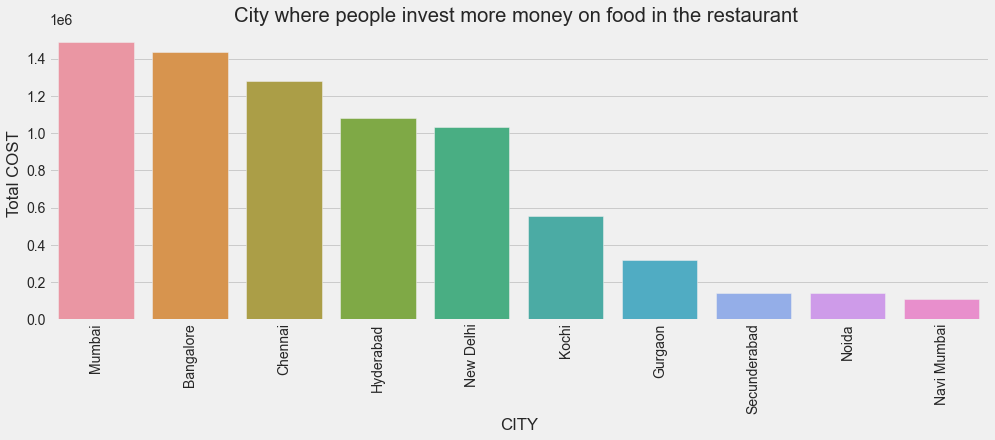

In [21]:
city_sum = train.groupby(['CITY'])['COST'].sum().sort_values(ascending = False).head(10).reset_index()
plt.figure(figsize=(15,5))
plt.title('City where people invest more money on food in the restaurant ')
sns.barplot(x = 'CITY' , y = 'COST' , data = city_sum)
plt.ylabel('Total COST')
plt.xticks(rotation = 90)
plt.show()

People in Mumbai, Bangalore, Chennai and New Delhi spend more money to eat food inside the restaurant

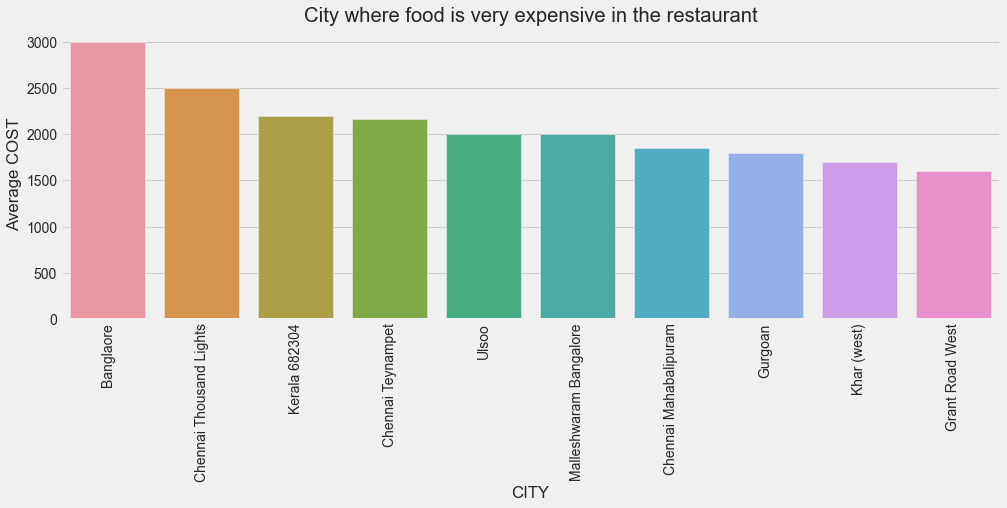

In [22]:
city_Avg = train.groupby(['CITY'])['COST'].mean().sort_values(ascending = False).head(10).reset_index()
plt.figure(figsize=(15,5))
plt.title('City where food is very expensive in the restaurant')
sns.barplot(x = 'CITY' , y = 'COST' , data = city_Avg)
plt.ylabel('Average COST')
plt.xticks(rotation = 90)
plt.show()

Restaurants in Bangalore and Chennai are very expensive

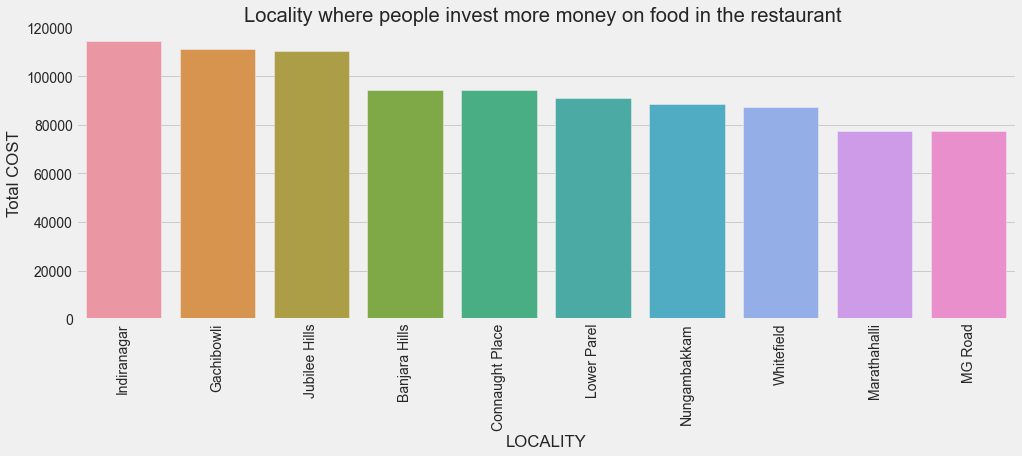

In [23]:
LOCALITY = train.groupby(['LOCALITY'])['COST'].sum().sort_values(ascending = False).head(10).reset_index()
plt.figure(figsize=(15,5))
plt.title('Locality where people invest more money on food in the restaurant ')
sns.barplot(x = 'LOCALITY' , y = 'COST' , data = LOCALITY)
plt.ylabel('Total COST')
plt.xticks(rotation = 90)
plt.show()

There are lots of restaurant in Indiranagar, Jubilee Hills and Connaught Place and People spend more money to eat food in this locality 

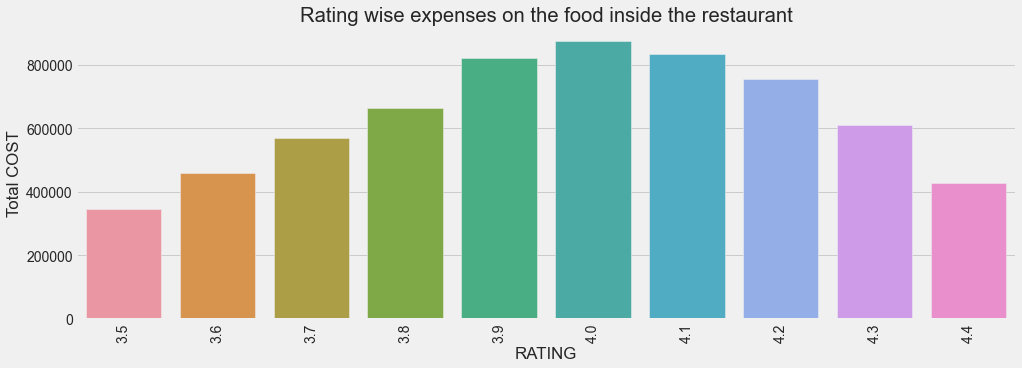

In [24]:
rating = train.groupby(['RATING'])['COST'].sum().sort_values(ascending = False).head(10).reset_index()
plt.figure(figsize=(15,5))
plt.title('Rating wise expenses on the food inside the restaurant')
sns.barplot(x = 'RATING' , y = 'COST' , data = rating)
plt.ylabel('Total COST')
plt.xticks(rotation = 90)
plt.show()

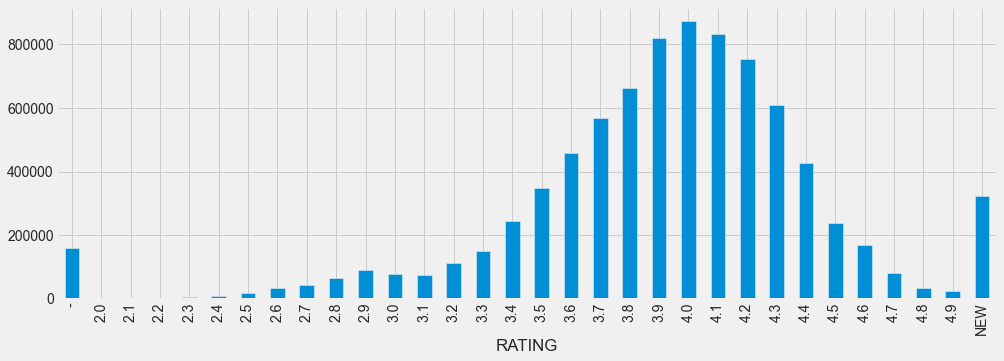

In [25]:
plt.figure(figsize=(15,5))
train.groupby(['RATING'])['COST'].sum().plot(kind='bar')

Here we see that food rating around 3.9 to 4.2 most people spend on this food and the rating 4.8 and 4.9 is  spend less on this 
rating category because less number people vote on this rating category and also it is traditional food where lots of people not like that

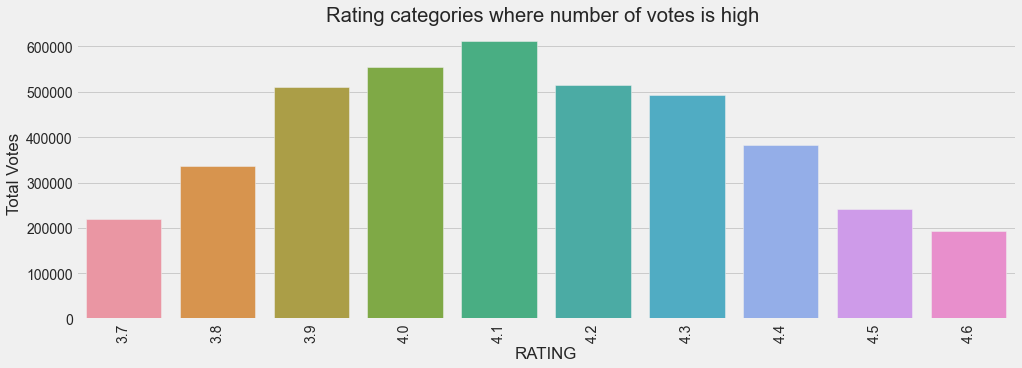

In [26]:
rating = train.groupby(['RATING'])['votes_no'].sum().sort_values(ascending = False).head(10).reset_index()
plt.figure(figsize=(15,5))
plt.title('Rating categories where number of votes is high ')
sns.barplot(x = 'RATING', y = 'votes_no' , data = rating)
plt.ylabel('Total Votes')
plt.xticks(rotation = 90)
plt.show()

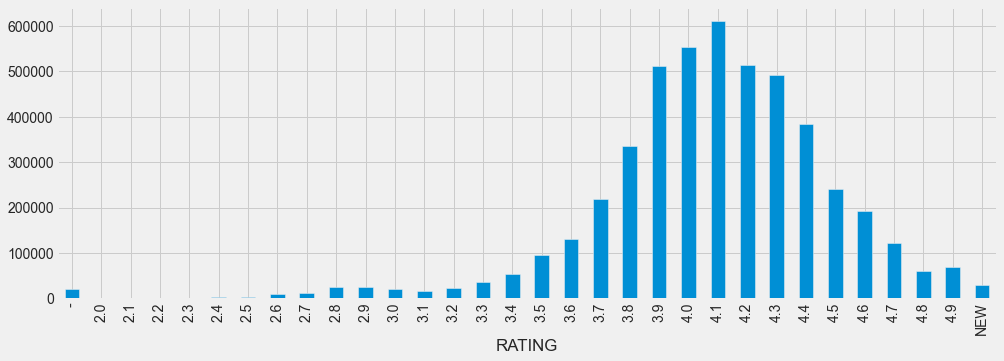

In [27]:
plt.figure(figsize=(15,5))
train.groupby(['RATING'])['votes_no'].sum().plot(kind='bar')

Most people voted around 3.9 to 4.3

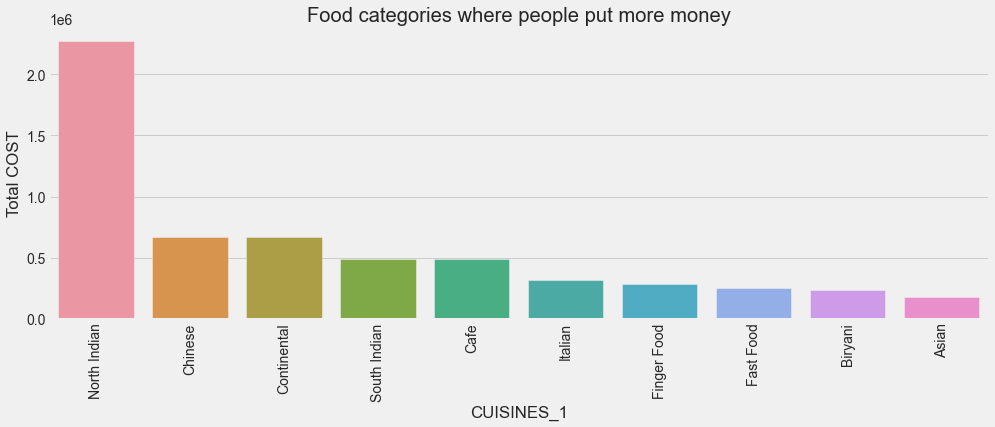

In [28]:
CUISINES = train.groupby(['CUISINES_1'])['COST'].sum().sort_values(ascending = False).head(10).reset_index()
plt.figure(figsize=(15,5))
plt.title('Food categories where people put more money')
sns.barplot(x = 'CUISINES_1' , y = 'COST' , data = CUISINES)
plt.ylabel('Total COST')
plt.xticks(rotation = 90)
plt.show()

North indian, chinese and south indian where people most like to eat

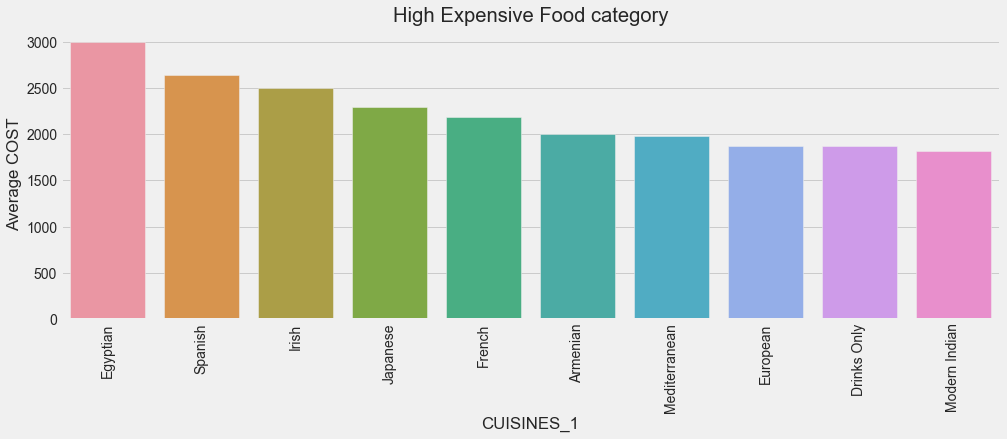

In [29]:
CUISINES = train.groupby(['CUISINES_1'])['COST'].mean().sort_values(ascending = False).head(10).reset_index()
plt.figure(figsize=(15,5))
plt.title('High Expensive Food category')
sns.barplot(x = 'CUISINES_1' , y = 'COST' , data = CUISINES)
plt.ylabel('Average COST')
plt.xticks(rotation = 90)
plt.show()

Egyptian and Spanish foods are very expensive

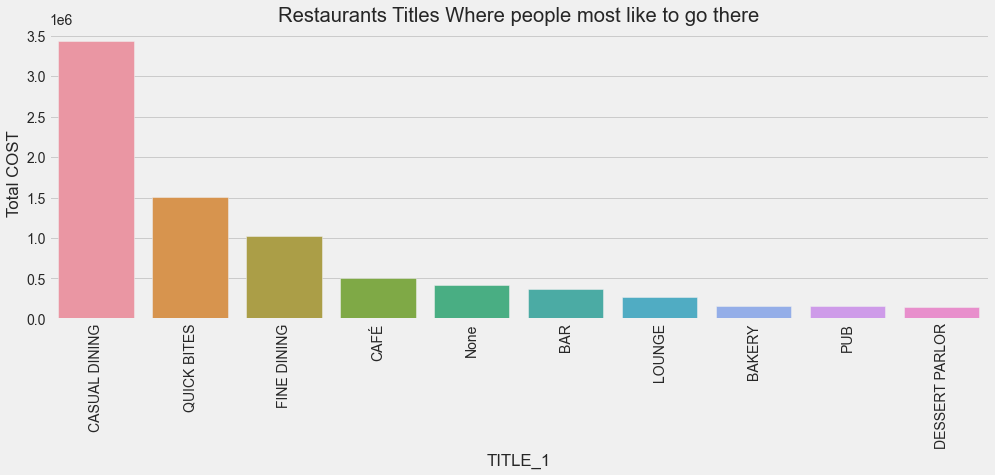

In [30]:
TITLE = train.groupby(['TITLE_1'])['COST'].sum().sort_values(ascending = False).head(10).reset_index()
plt.figure(figsize=(15,5))
plt.title('Restaurants Titles Where people most like to go there')
sns.barplot(x = 'TITLE_1' , y = 'COST' , data = TITLE)
plt.ylabel('Total COST')
plt.xticks(rotation = 90)
plt.show()

Most of like causal dining, fine dining and cafe type restaurants

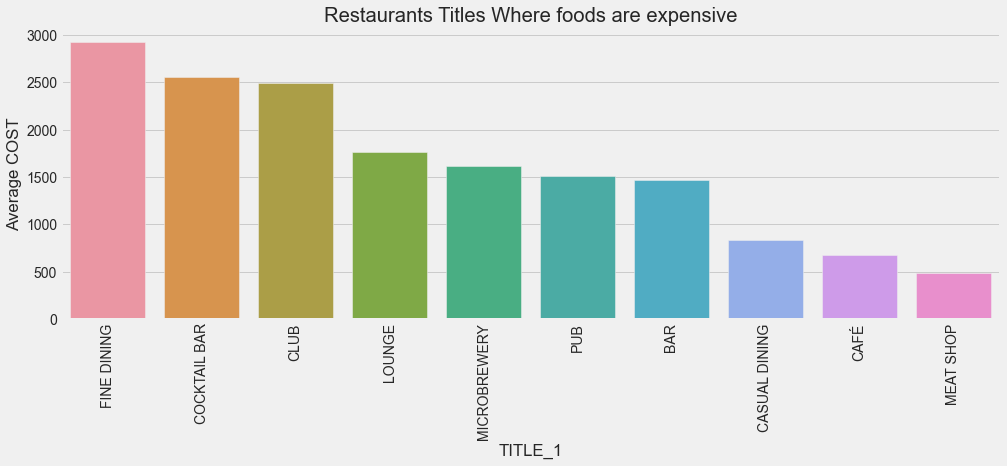

In [31]:
TITLE = train.groupby(['TITLE_1'])['COST'].mean().sort_values(ascending = False).head(10).reset_index()
plt.figure(figsize=(15,5))
plt.title('Restaurants Titles Where foods are expensive')
sns.barplot(x = 'TITLE_1' , y = 'COST' , data = TITLE)
plt.ylabel('Average COST')
plt.xticks(rotation = 90)
plt.show()

fine dining, cocktailbar, club and lounge are very expensive

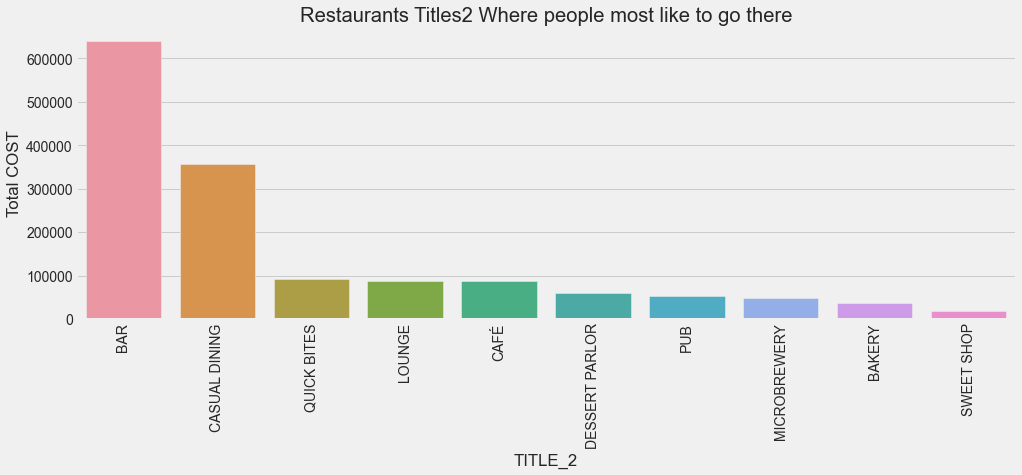

In [32]:
TITLE2 = train.groupby(['TITLE_2'])['COST'].sum().sort_values(ascending = False).head(10).reset_index()
plt.figure(figsize=(15,5))
plt.title('Restaurants Titles2 Where people most like to go there')
sns.barplot(x = 'TITLE_2' , y = 'COST' , data = TITLE2)
plt.ylabel('Total COST')
plt.xticks(rotation = 90)
plt.show()

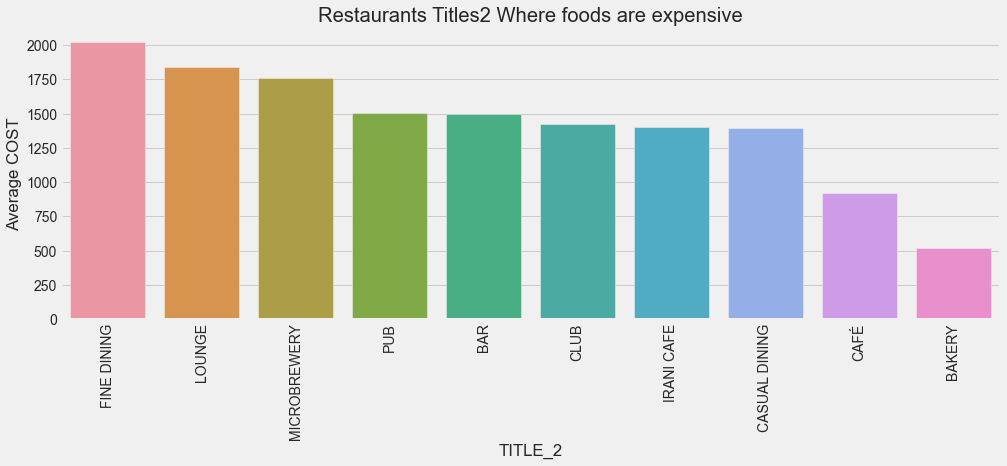

In [33]:
TITLE2 = train.groupby(['TITLE_2'])['COST'].mean().sort_values(ascending = False).head(10).reset_index()
plt.figure(figsize=(15,5))
plt.title('Restaurants Titles2 Where foods are expensive')
sns.barplot(x = 'TITLE_2' , y = 'COST' , data = TITLE2)
plt.ylabel('Average COST')
plt.xticks(rotation = 90)
plt.show()

***Check Missing values***

In [34]:
# train dataset
train.isnull().sum()

TITLE                0
RESTAURANT_ID        0
CUISINES             0
TIME                 0
CITY               112
LOCALITY            98
RATING               2
VOTES             1204
COST                 0
votes_no             0
CUISINES_1           0
CUISINES_2        3062
CUISINES_3        6999
CUISINES_4        9995
CUISINES_5       11675
CUISINES_6       12276
CUISINES_7       12514
CUISINES_8       12613
CUISINES_9       12690
CUISINES_10      12690
TITLE_1              0
TITLE_2          11208
dtype: int64

In [35]:
# test dataset
test.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY               35
LOCALITY           30
RATING              2
VOTES             402
votes_no            0
CUISINES_1          0
CUISINES_2        985
CUISINES_3       2331
CUISINES_4       3314
CUISINES_5       3875
CUISINES_6       4094
CUISINES_7       4157
CUISINES_8       4200
CUISINES_9       4231
CUISINES_10      4231
TITLE_1             0
TITLE_2          3769
dtype: int64

***Remove Missing Values train dataset ***

In [36]:
train['RATING'] = train['RATING'].astype('object')

train['RATING'] = train['RATING'].replace({'-':0.0, 'NEW':5.0}) # replace the rating

train['RATING'] = train['RATING'].astype(float) # replace the rating

train['RATING'].fillna(train['RATING'].median(), inplace = True)# filling with the median

train['LOCALITY'].fillna(train['LOCALITY'].mode()[0], inplace = True)

train['CITY'].fillna(train['CITY'].mode()[0], inplace = True)

New_train = train.drop(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'VOTES'],axis = 1)

New_train.fillna('xxx', inplace = True)



***Remove Missing Values test dataset ***

In [37]:

test['RATING'] = test['RATING'].astype('object') # replace the rating

test['RATING'] = test['RATING'].replace({'-':0.0, 'NEW':5.0}) # replace the rating


test['RATING'] = test['RATING'].astype(float) # replace the rating

test['RATING'].fillna(test['RATING'].median(), inplace = True)# filling with the median

test['LOCALITY'].fillna(test['LOCALITY'].mode()[0], inplace = True)

test['CITY'].fillna(test['CITY'].mode()[0], inplace = True)

New_test = test.drop(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'VOTES'],axis = 1)

New_test.fillna('xxx', inplace = True)


In [38]:
# train dataset
New_train.isnull().sum()

CITY           0
LOCALITY       0
RATING         0
COST           0
votes_no       0
CUISINES_1     0
CUISINES_2     0
CUISINES_3     0
CUISINES_4     0
CUISINES_5     0
CUISINES_6     0
CUISINES_7     0
CUISINES_8     0
CUISINES_9     0
CUISINES_10    0
TITLE_1        0
TITLE_2        0
dtype: int64

In [39]:
# test dataset
New_test.isnull().sum()

CITY           0
LOCALITY       0
RATING         0
votes_no       0
CUISINES_1     0
CUISINES_2     0
CUISINES_3     0
CUISINES_4     0
CUISINES_5     0
CUISINES_6     0
CUISINES_7     0
CUISINES_8     0
CUISINES_9     0
CUISINES_10    0
TITLE_1        0
TITLE_2        0
dtype: int64

# Skewness

In [40]:
New_train.skew(axis=0)

RATING      -2.618518
COST         3.978801
votes_no    14.609221
dtype: float64

In [41]:
# Remove skewness
New_train['COST']=np.log1p(New_train['COST'])
New_train['votes_no']=np.log1p(New_train['votes_no'])

# Outliers

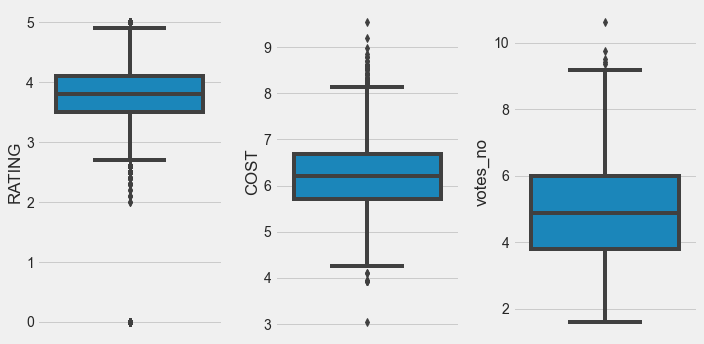

In [42]:
boxp = New_train[['RATING','COST','votes_no']]
fig = plt.figure(figsize=(10,5))
for i in range(len(boxp.columns)):
    fig.add_subplot(1,3,i+1)
    sns.boxplot(y=boxp.iloc[:,i])

plt.tight_layout()
plt.show()

In [43]:
# Remove outliers
from scipy.stats import zscore
z_score=abs(zscore(boxp))
print("The shape of dataset before removing outliers",New_train.shape)
New_train=New_train.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",New_train.shape)

The shape of dataset before removing outliers (12690, 17)
The shape of dataset after removing outliers (12137, 17)


In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:


New_train['CITY'] = le.fit_transform(New_train['CITY'])
New_train['LOCALITY'] = le.fit_transform(New_train['LOCALITY'])


New_train['TITLE_1'] = le.fit_transform(New_train['TITLE_1'])
New_train['TITLE_2'] = le.fit_transform(New_train['TITLE_2'])


New_train['CUISINES_1'] = le.fit_transform(New_train['CUISINES_1'])
New_train['CUISINES_2'] = le.fit_transform(New_train['CUISINES_2'])
New_train['CUISINES_3'] = le.fit_transform(New_train['CUISINES_3'])
New_train['CUISINES_4'] = le.fit_transform(New_train['CUISINES_4'])
New_train['CUISINES_5'] = le.fit_transform(New_train['CUISINES_5'])
New_train['CUISINES_6'] = le.fit_transform(New_train['CUISINES_6'])
New_train['CUISINES_7'] = le.fit_transform(New_train['CUISINES_7'])
New_train['CUISINES_8'] = le.fit_transform(New_train['CUISINES_8'])
New_train['CUISINES_9'] = le.fit_transform(New_train['CUISINES_9'])
New_train['CUISINES_10'] = le.fit_transform(New_train['CUISINES_10'])


(17.5, -0.5)

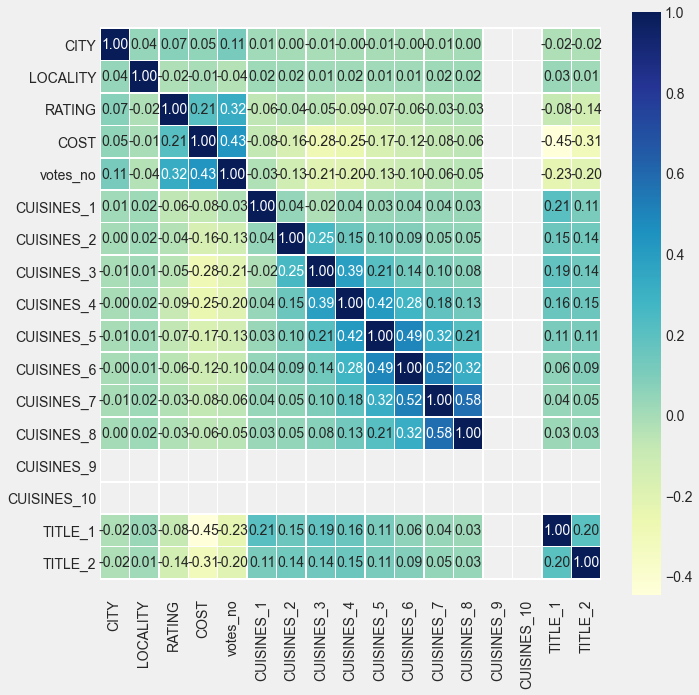

In [46]:
# Let's make our correlation matrix a little prettier
corr_matrix = New_train.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

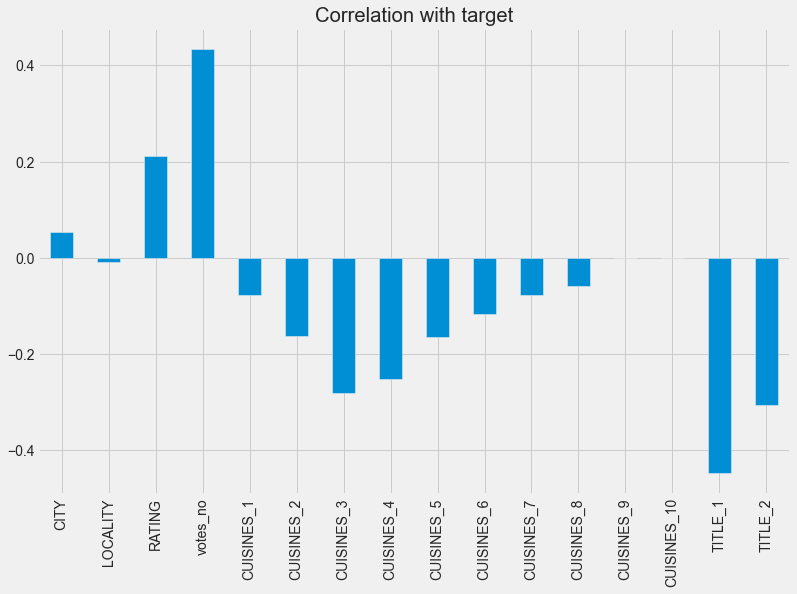

In [47]:
New_train.drop('COST', axis=1).corrwith(New_train.COST).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

1) Here we see that Ratings and Votes are positively correlated with the taret variables(Cost)

2) cusines and titles are neatively correlated with the target variables (cost)

3) City and Locality not very good correlation with the target

# Train-Test Split

In [48]:
X = New_train.drop(['COST'], axis=1)
y = New_train.COST

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [50]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_squared_log_error,r2_score


In [51]:
#to save time all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','RMSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(np.sqrt(mean_squared_error(y_test,pred)),3),
                          
                          np.round(r2_score(y_test,pred),3)
                         ]

In [52]:
results

,MAE,RMSE,R2-score
Linear Regression,0.414,0.554,0.389
Decision Tree,0.407,0.538,0.423
Random Forest,0.287,0.372,0.724
Support Vector Machines,0.543,0.695,0.038
K-nearest Neighbors,0.561,0.752,-0.127
XGBoost,0.287,0.369,0.729


Xgboost perform better than others

In [53]:
from sklearn.model_selection import GridSearchCV
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [5, 10, 15,20,25],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [54]:
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 316 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 1516 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2393 out of 2400 | elapsed:  2.0min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  2.0min finished


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 25,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [55]:
Xgb = XGBRegressor(colsample_bytree = 0.7,
  learning_rate = 0.1,
  max_depth = 10,
  min_child_weight = 5,
  n_estimators = 25,
  objective = 'reg:squarederror',
  subsample = 0.7)

In [56]:
Xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=25, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
import joblib
joblib.dump(Xgb, 'FoodCost_pkl')

['FoodCost_pkl']